<a href="https://colab.research.google.com/github/vivekdubey74vv/Stocks-Prices-Prediction--using-LSTM/blob/main/Stock_Price_Prediction_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [6]:
 data = pd.read_csv('/content/Google_train_data.csv')
data.head()



,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [7]:
data.tail()


,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"1,770,000"


In [8]:
 data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4463 entries, 0 to 4462
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          4463 non-null   object 
 1   Open          4463 non-null   float64
 2   High          4463 non-null   float64
 3   Low           4463 non-null   float64
 4   Close         4463 non-null   float64
 5   Volume        4463 non-null   int64  
 6   Dividends     4463 non-null   float64
 7   Stock Splits  4463 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 279.1+ KB


In [9]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [12]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [15]:
X_train = []
y_train = []
for i in range (60,1149):
 X_train.append(trainData[i-60:i,0])
 y_train.append(trainData[i,0])
X_train,y_train = np.array(X_train),np.array(y_train)

In [17]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1089, 60, 1)

In [20]:
model = Sequential()
model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")


In [21]:
 hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)


Epoch 1/20
35/35 - 11s - loss: 0.0550 - 11s/epoch - 321ms/step
Epoch 2/20
35/35 - 5s - loss: 0.0137 - 5s/epoch - 152ms/step
Epoch 3/20
35/35 - 5s - loss: 0.0109 - 5s/epoch - 136ms/step
Epoch 4/20
35/35 - 5s - loss: 0.0096 - 5s/epoch - 154ms/step
Epoch 5/20
35/35 - 5s - loss: 0.0082 - 5s/epoch - 135ms/step
Epoch 6/20
35/35 - 5s - loss: 0.0074 - 5s/epoch - 147ms/step
Epoch 7/20
35/35 - 5s - loss: 0.0068 - 5s/epoch - 142ms/step
Epoch 8/20
35/35 - 5s - loss: 0.0070 - 5s/epoch - 137ms/step
Epoch 9/20
35/35 - 7s - loss: 0.0074 - 7s/epoch - 205ms/step
Epoch 10/20
35/35 - 5s - loss: 0.0070 - 5s/epoch - 149ms/step
Epoch 11/20
35/35 - 5s - loss: 0.0063 - 5s/epoch - 152ms/step
Epoch 12/20
35/35 - 5s - loss: 0.0066 - 5s/epoch - 135ms/step
Epoch 13/20
35/35 - 5s - loss: 0.0064 - 5s/epoch - 156ms/step
Epoch 14/20
35/35 - 5s - loss: 0.0061 - 5s/epoch - 134ms/step
Epoch 15/20
35/35 - 6s - loss: 0.0063 - 6s/epoch - 159ms/step
Epoch 16/20
35/35 - 5s - loss: 0.0064 - 5s/epoch - 135ms/step
Epoch 17/20
35/

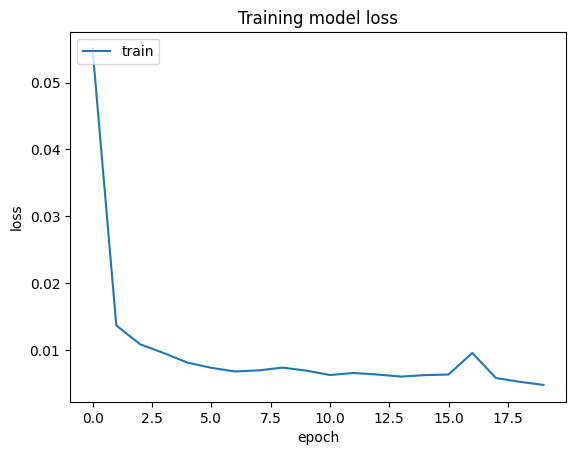

In [22]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [24]:
testData = pd.read_csv('/content/Google_test_data.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values
#input array for the model
inputClosing = testData.iloc[:,0:].values
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):
  X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [25]:
y_pred = model.predict(X_test)
y_pred

6/6 [==============================] - 2s 43ms/step


array([[1.17313  ],
       [1.175729 ],
       [1.1861206],
       [1.202448 ],
       [1.2174529],
       [1.2217454],
       [1.2137909],
       [1.1989778],
       [1.1869433],
       [1.1810986],
       [1.1731638],
       [1.1617986],
       [1.151005 ],
       [1.140857 ],
       [1.1367446],
       [1.1389613],
       [1.1535074],
       [1.1788015],
       [1.209977 ],
       [1.2428921],
       [1.2616756],
       [1.2655343],
       [1.2520999],
       [1.2270259],
       [1.2004099],
       [1.1811392],
       [1.1716745],
       [1.1668724],
       [1.1586398],
       [1.1479237],
       [1.1362262],
       [1.1231155],
       [1.1043985],
       [1.0809766],
       [1.0685545],
       [1.0731577],
       [1.0908245],
       [1.1143067],
       [1.1390197],
       [1.1555002],
       [1.1709511],
       [1.1875125],
       [1.2055056],
       [1.2224281],
       [1.2348913],
       [1.2388691],
       [1.2321268],
       [1.2236294],
       [1.2189659],
       [1.2210226],


In [26]:
 predicted_price = sc.inverse_transform(y_pred)


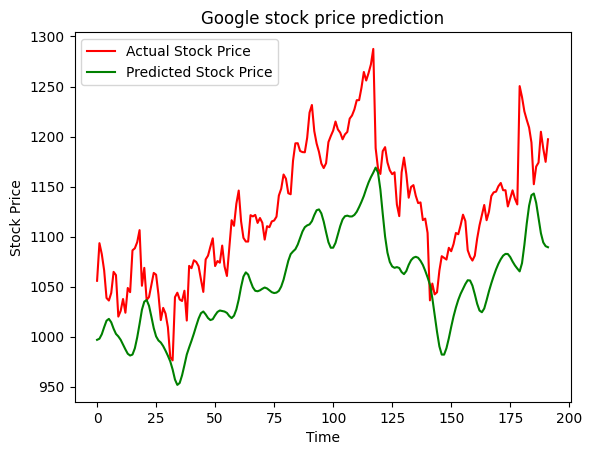

In [27]:
 plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [38]:
df.fillna(df.mean(), inplace=True)

<ipython-input-38-bf934754a5b1>:1: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



In [39]:
df['Date'] = pd.to_datetime(df['Date'])

In [48]:
df.sort_values(by='Date', inplace=True)

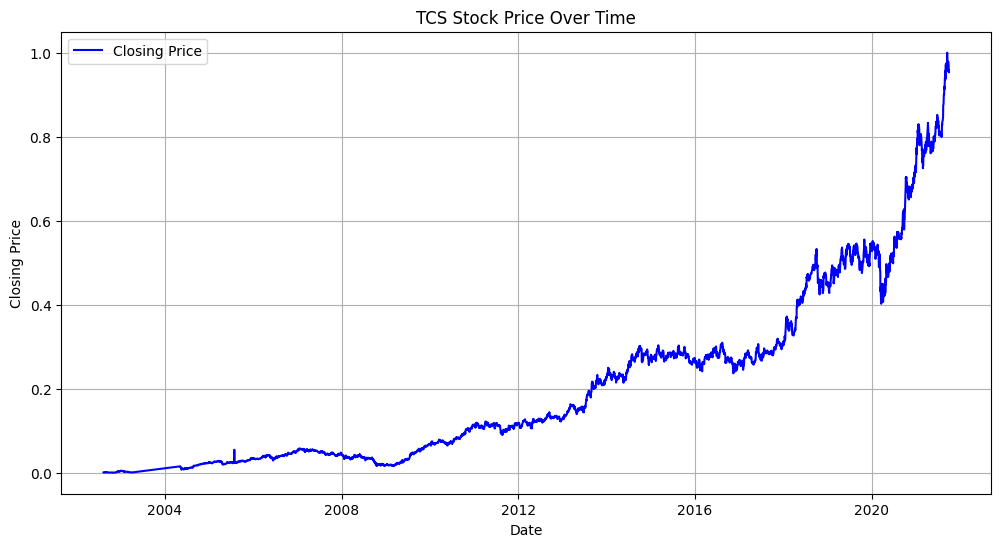

In [49]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue')
plt.title('TCS Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

#Data Preprocessing

In [50]:
# Normalize or scale the numerical features using Min-Max scaling
scaler = MinMaxScaler()
scaled_features = ['Open', 'High', 'Low', 'Close', 'Volume']
df[scaled_features] = scaler.fit_transform(df[scaled_features])

In [60]:
from sklearn.preprocessing import MinMaxScaler

features_to_scale = ['Open', 'High', 'Low', 'Close', 'Volume']

scaler = MinMaxScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])
train_size = int(0.7 * len(df))
val_size = int(0.15 * len(df))
test_size = len(df) - train_size - val_size
 X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]

train_data = df[:train_size]
val_data = df[train_size:train_size + val_size]
test_data = df[train_size + val_size:]
train_data.reset_index(drop=True, inplace=True)
val_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)


IndentationError: ignored

#Create Sequences for LSTM

In [56]:
# Define the sequence length (e.g., 30 days of historical data)
sequence_length = 30

# Create sequences for LSTM
X = []
y = []

# Iterate through the dataset
for i in range(len(df) - sequence_length):
    # Extract a sequence of historical data (input)
    x_seq = df.iloc[i:i + sequence_length][scaled_features].values

    # Extract the corresponding next day's closing price (output)
    y_seq = df.iloc[i + sequence_length]['Close']

    X.append(x_seq)
    y.append(y_seq)

# Convert the lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Print the shapes to verify
print("Input sequences shape:", X.shape)
print("Output sequences shape:", y.shape)


Input sequences shape: (4433, 30, 5)
Output sequences shape: (4433,)


#Build the LSTM Model

In [58]:
# Import Keras libraries
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()

# Add LSTM layers (you can customize the number of units and layers)
model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, len(scaled_features))))
model.add(LSTM(units=50))
model.add(Dense(units=1))  # Output layer with one neuron (for predicting the next day's closing price)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Print a summary of the model architecture
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 50)            11200     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 31,451
Trainable params: 31,451
Non-trainable params: 0
_________________________________________________________________


#Train the Model

In [59]:
# Import additional Keras libraries for training
from keras.callbacks import EarlyStopping

# Define the number of epochs (you can adjust this)
epochs = 100

# Define the batch size for training
batch_size = 32

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
    verbose=1
)

# Plot training and validation loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


NameError: ignored

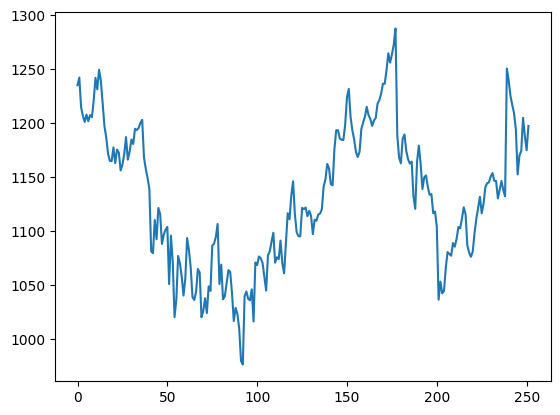

In [12]:
import matplotlib.pyplot as plt
plt.plot(df1)

#lstm

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [14]:
print(df1)

[[0.83116024]
 [0.8539312 ]
 [0.76490251]
 [0.73956202]
 [0.72180113]
 [0.74367311]
 [0.72392098]
 [0.74225975]
 [0.73599706]
 [0.78504003]
 [0.85303182]
 [0.81876306]
 [0.87705579]
 [0.84436034]
 [0.77713894]
 [0.70908286]
 [0.67529554]
 [0.6269912 ]
 [0.6057618 ]
 [0.60515176]
 [0.6460047 ]
 [0.59930622]
 [0.63948482]
 [0.63049225]
 [0.57756323]
 [0.59416755]
 [0.62586718]
 [0.67654816]
 [0.6098086 ]
 [0.63318998]
 [0.66941824]
 [0.65605739]
 [0.70150326]
 [0.69774541]
 [0.70365525]
 [0.71907125]
 [0.72819242]
 [0.61655312]
 [0.58173822]
 [0.55482402]
 [0.52222502]
 [0.33723023]
 [0.33112789]
 [0.42992032]
 [0.37265556]
 [0.46589178]
 [0.447938  ]
 [0.35890932]
 [0.38617676]
 [0.40127206]
 [0.40939741]
 [0.23924073]
 [0.38331828]
 [0.305916  ]
 [0.14086603]
 [0.19267084]
 [0.32293825]
 [0.30119487]
 [0.26197993]
 [0.20513232]
 [0.2556208 ]
 [0.37631696]
 [0.34102023]
 [0.28882983]
 [0.20044334]
 [0.19215725]
 [0.21659836]
 [0.28420476]
 [0.27386313]
 [0.14060904]
 [0.15910856]
 [0.19

#Spillting the data

In [16]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [17]:
training_size,test_size

(163, 89)

In [18]:
train_data

array([[0.83116024],
       [0.8539312 ],
       [0.76490251],
       [0.73956202],
       [0.72180113],
       [0.74367311],
       [0.72392098],
       [0.74225975],
       [0.73599706],
       [0.78504003],
       [0.85303182],
       [0.81876306],
       [0.87705579],
       [0.84436034],
       [0.77713894],
       [0.70908286],
       [0.67529554],
       [0.6269912 ],
       [0.6057618 ],
       [0.60515176],
       [0.6460047 ],
       [0.59930622],
       [0.63948482],
       [0.63049225],
       [0.57756323],
       [0.59416755],
       [0.62586718],
       [0.67654816],
       [0.6098086 ],
       [0.63318998],
       [0.66941824],
       [0.65605739],
       [0.70150326],
       [0.69774541],
       [0.70365525],
       [0.71907125],
       [0.72819242],
       [0.61655312],
       [0.58173822],
       [0.55482402],
       [0.52222502],
       [0.33723023],
       [0.33112789],
       [0.42992032],
       [0.37265556],
       [0.46589178],
       [0.447938  ],
       [0.358

In [23]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [20]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [21]:
print(X_train.shape), print(y_train.shape)

(62, 100)
(62,)


(None, None)

In [22]:
print(X_test.shape), print(ytest.shape)

(0,)
(0,)


(None, None)